In [ ]:
import pandas as pd

# Load Parquet file into a DataFrame
df = pd.read_parquet('beacon_output/merged_subset.parquet', engine='pyarrow')
# This is a temporary fix as the merged instance works with seconds since 1970 which isn't supported by parquet (but will be addressed by beacon in the future)
df['COMMON_TIME'] = pd.to_datetime(df['COMMON_TIME'], unit='s')
df


,CHLOROPHYLL,CHLOROPHYLL_QC,COMMON_CHLOROPHYLL_PER_VOLUME_UNITS,COMMON_CHLOROPHYLL_PER_VOLUME_STANDARD_NAME,COMMON_CHLOROPHYLL_PER_VOLUME_P01,COMMON_CHLOROPHYLL_PER_VOLUME_P06,COMMON_CHLOROPHYLL_L05,COMMON_CHLOROPHYLL_L06,COMMON_CHLOROPHYLL_L22,COMMON_CHLOROPHYLL_L33,...,COMMON_EDMERP_CODE,COMMON_CSR,COMMON_ODV_TAG,featureType,COMMON_TIME,DEPTH,DEPTH_QC,DEPTH_UNITS,LONGITUDE,LATITUDE
0,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::30,None,,,...,None,None,48625049001_PCh_Bot,timeSeries,2015-01-26 10:35:26,11.000000,1,m,-3.09375,47.534763
1,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::30,None,,,...,None,None,48625049001_PCh_Bot,timeSeries,2015-02-10 09:53:15,11.000000,1,m,-3.09375,47.534763
2,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::30,None,,,...,None,None,48625049001_PCh_Bot,timeSeries,2015-02-25 10:15:14,11.000000,1,m,-3.09375,47.534763
3,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::30,None,,,...,None,None,48625049001_PCh_Bot,timeSeries,2015-03-16 14:04:06,11.000000,1,m,-3.09375,47.534763
4,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::30,None,,,...,None,None,48625049001_PCh_Bot,timeSeries,2015-03-30 13:50:23,11.000000,1,m,-3.09375,47.534763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17417226,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::134,None,,,...,None,None,48655235173,profile,2018-04-01 05:03:00,878.877747,1,m,4.85225,41.751999
17417227,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::134,None,,,...,None,None,48655235173,profile,2018-04-01 05:03:00,905.155884,1,m,4.85225,41.751999
17417228,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::134,None,,,...,None,None,48655235173,profile,2018-04-01 05:03:00,928.171204,1,m,4.85225,41.751999
17417229,NaN,9,mg/m^3,Concentration of chlorophyll per unit volume o...,SDN:P01::CHLTVOLU,SDN:P06::UMMC,SDN:L05::134,None,,,...,None,None,48655235173,profile,2018-04-01 05:03:00,953.159241,1,m,4.85225,41.751999


: 

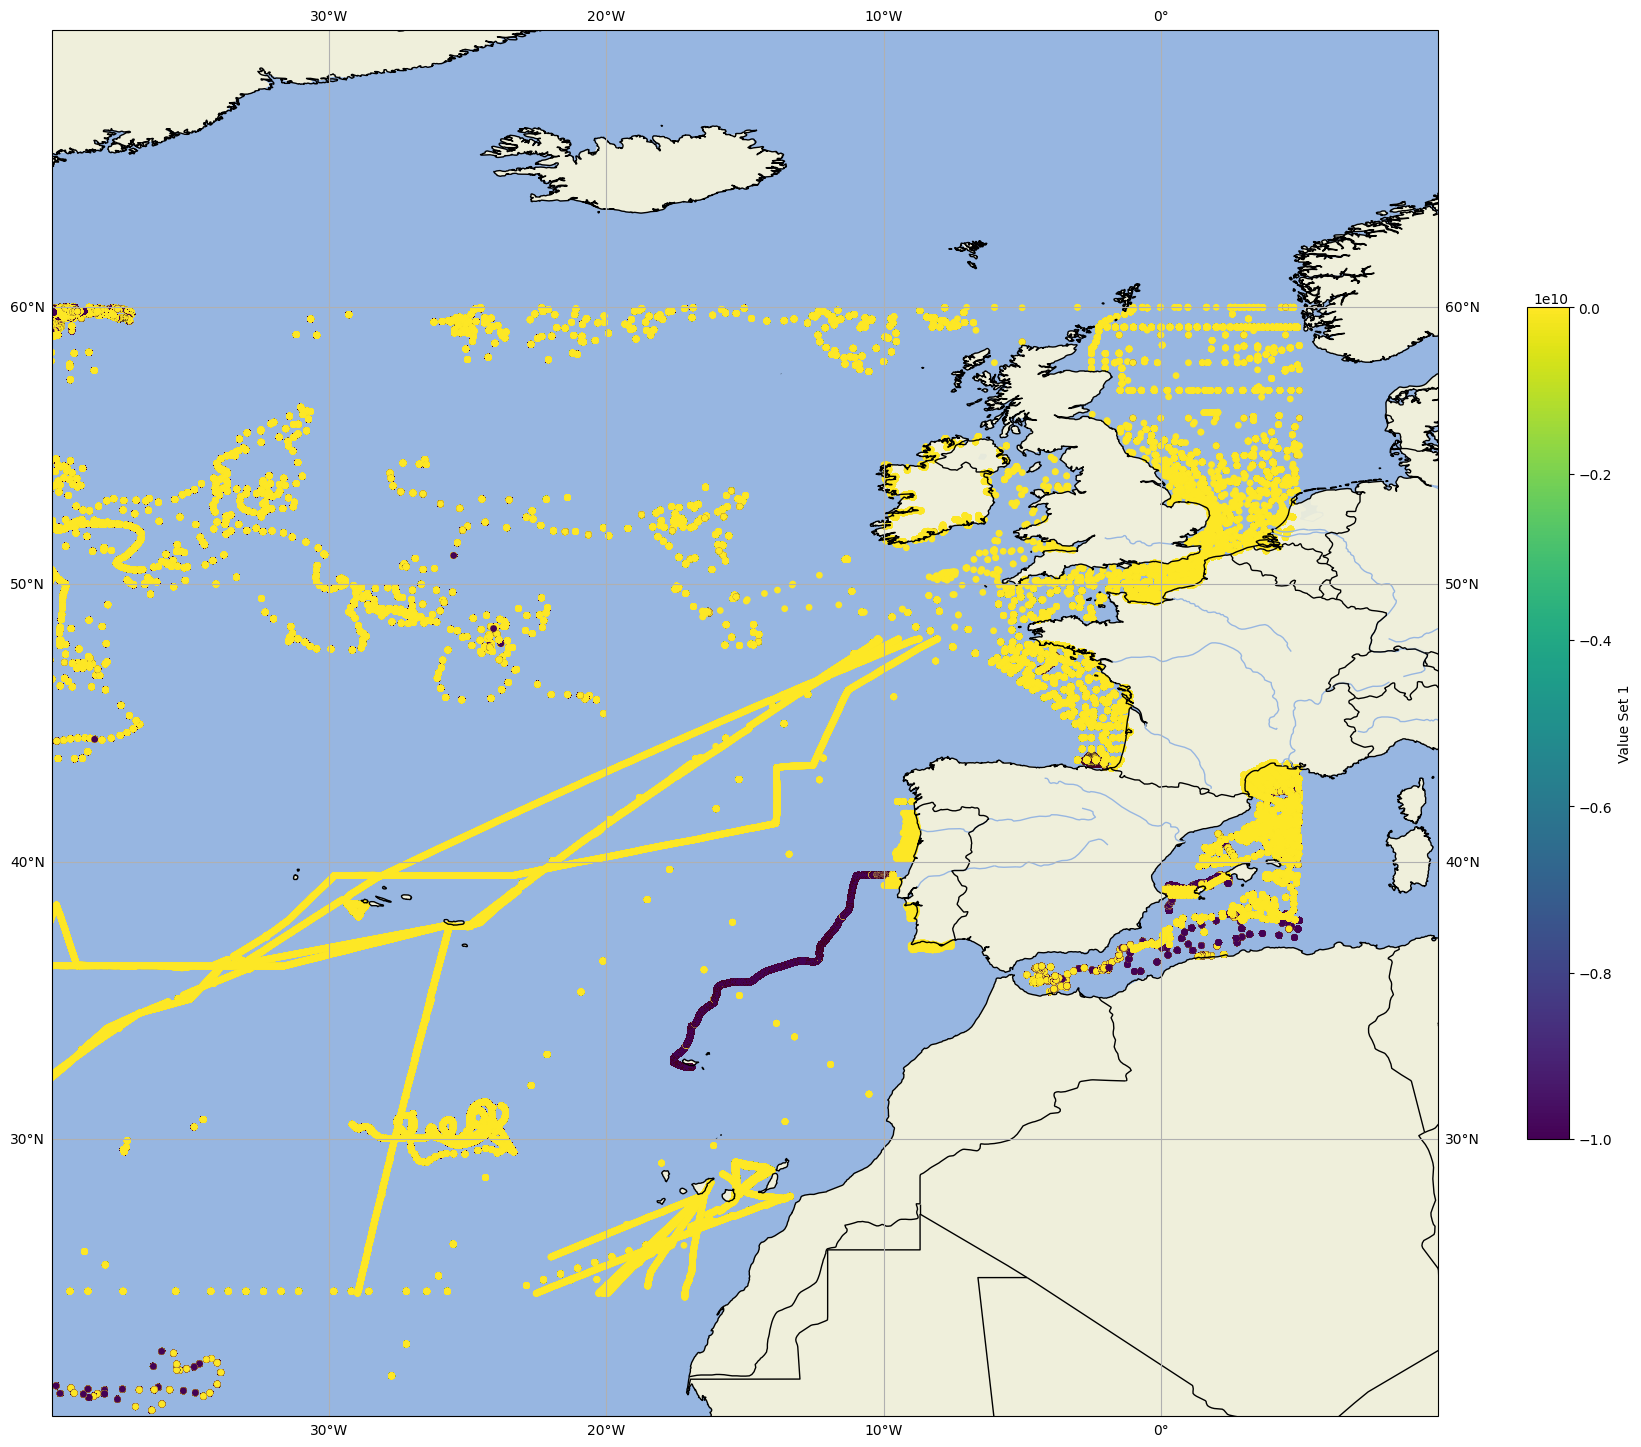

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(23, 18))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-40, 10, 20, 70], crs=ccrs.PlateCarree())  # (west, east, south, north)

ax.coastlines(resolution="10m")
ax.gridlines(draw_labels=True)

sc = ax.scatter(df["LONGITUDE"], df["LATITUDE"], c=df['CHLOROPHYLL'], cmap="viridis", s=15, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     
ax.add_feature(cfeature.BORDERS)   
ax.add_feature(cfeature.LAKES, alpha=0.1) 

cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.6, label="Value Set 1")
# cbar.set_label(f"{parameter} [{df["Unit"].iloc[0]}]")

# plt.title(f"{parameter} {regionname} {mindate}-{maxdate} [{mindepth}-{maxdepth}m]")

plt.show()

In [1]:
print(df['SOURCE_BDI'].unique())
print(df['featureType'].unique())
# print(df[''].unique())

NameError: name 'df' is not defined